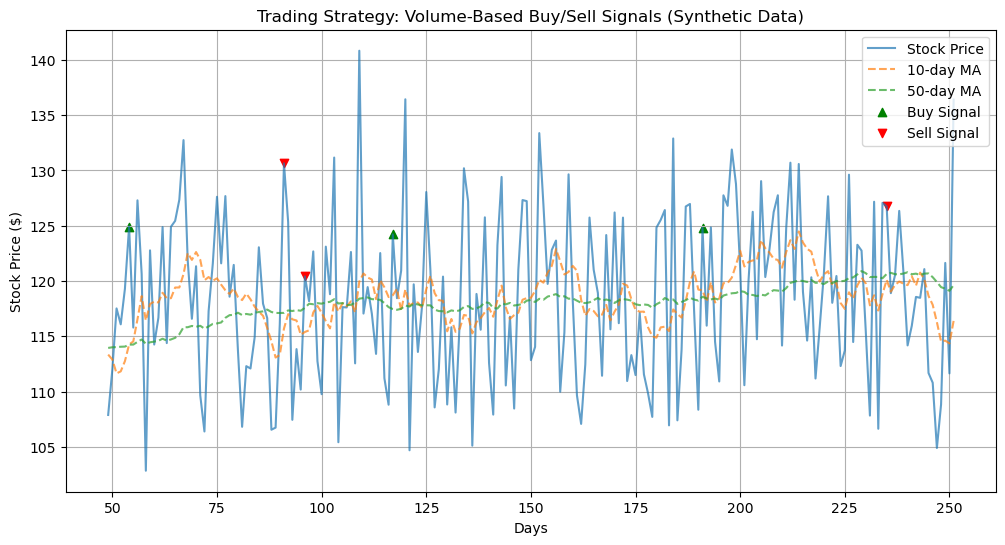

     Stock Closing Price Signal
54            124.914435    Buy
91            130.645728   Sell
96            120.416573   Sell
117           124.211629    Buy
191           124.806951    Buy
235           126.750588   Sell


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating stock market data: Volume-Based Trading Strategy

# Generate synthetic stock data for 252 trading days (1 year)
np.random.seed(42)
days = 252

# Simulate trading volume (random but increasing trend)
trading_volume = np.random.randint(1000000, 5000000, days) + np.linspace(0, 1000000, days)

# Simulate stock price (influenced by trading volume)
stock_price = 100 + 0.000005 * trading_volume + np.random.normal(0, 5, days)

# Create a DataFrame
stock_data = pd.DataFrame({
    "Trading Volume": trading_volume,
    "Stock Closing Price": stock_price
})

# Calculate moving averages
stock_data["10-day MA"] = stock_data["Stock Closing Price"].rolling(window=10).mean()
stock_data["50-day MA"] = stock_data["Stock Closing Price"].rolling(window=50).mean()
stock_data["Volume MA"] = stock_data["Trading Volume"].rolling(window=20).mean()

# Ensure alignment before operations
stock_data.dropna(inplace=True)

# Define Volume Spike Condition
stock_data["Volume Spike"] = stock_data["Trading Volume"] > (1.5 * stock_data["Volume MA"])

# Define Buy & Sell Conditions
stock_data["Buy Signal"] = (stock_data["Volume Spike"]) & (stock_data["10-day MA"] > stock_data["50-day MA"])
stock_data["Sell Signal"] = (stock_data["Volume Spike"]) & (stock_data["10-day MA"] < stock_data["50-day MA"])

# Plot Stock Price with Buy & Sell Signals
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["Stock Closing Price"], label="Stock Price", alpha=0.7)
plt.plot(stock_data.index, stock_data["10-day MA"], label="10-day MA", linestyle="dashed", alpha=0.7)
plt.plot(stock_data.index, stock_data["50-day MA"], label="50-day MA", linestyle="dashed", alpha=0.7)

# Mark Buy and Sell Signals
plt.scatter(stock_data.index[stock_data["Buy Signal"]], stock_data["Stock Closing Price"][stock_data["Buy Signal"]], 
            label="Buy Signal", marker="^", color="g", alpha=1)
plt.scatter(stock_data.index[stock_data["Sell Signal"]], stock_data["Stock Closing Price"][stock_data["Sell Signal"]], 
            label="Sell Signal", marker="v", color="r", alpha=1)

plt.title("Trading Strategy: Volume-Based Buy/Sell Signals (Synthetic Data)")
plt.xlabel("Days")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid()
plt.show()

# Extract trade signals
trade_signals = stock_data[stock_data["Buy Signal"] | stock_data["Sell Signal"]][["Stock Closing Price", "Buy Signal", "Sell Signal"]]
trade_signals["Signal"] = np.where(trade_signals["Buy Signal"], "Buy", "Sell")
trade_signals = trade_signals.drop(columns=["Buy Signal", "Sell Signal"])

# Display trade signals
print(trade_signals)
